In [1]:
import seaborn as sns
from pydataset import data
import pandas as pd
from pandas import DataFrame
import acquire1
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
iris = data('iris')

In [ ]:
iris.head()

In [ ]:
#print the first 3 rows
iris.head(3)

In [ ]:
#print the number of rows and columns (shape)
iris.shape

In [ ]:
#print the data type of each column
iris.dtypes

In [ ]:
#print the summary statistics for each of the numeric variables. Would you recommend 
#rescaling the data based on these statistics? 
#rescaling means normalize the data within a particular range, I don't think they need to be 
# rescaled because they seem to be in a normalized range.
iris.describe().T

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.


In [ ]:
#read the csv file and name it df_excel as instructed
df_excel = pd.read_csv("Telco.csv")

In [ ]:
#show me the dataframe
df_excel

In [ ]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

In [ ]:
#print the number of rows of your original dataframe
df_excel.shape[0]

In [ ]:
#print the first 5 column names
df_excel.columns[0:5]

In [ ]:
#print the column names that have a data type of object
df_excel.select_dtypes

In [ ]:
#print the summary statistics for each of the numeric variables
df_excel.describe()

In [ ]:
#print the unique values for each of your categorical variables
df_excel.nunique()

3. Read the data from this google sheet into a dataframe, df_google

In [ ]:
df_google = pd.read_csv("googlesheets.csv")

In [ ]:
df_google

In [ ]:
#print the first 3 rows
print(df_google.iloc[:3])

In [ ]:
#print the number of rows and columns
df_google.shape

In [ ]:
#print the column names
df_google.columns

In [ ]:
#print the data type of each column
df_google.dtypes.T

In [ ]:
#print the summary statistics for each of the numeric variables
df_google.describe()

In [ ]:
#print the unique values for each of your categorical variables

df_google.nunique()

In [ ]:
######################################################## PREPARE

In [ ]:
import env

In [ ]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df


def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [ ]:
df= acquire1.get_iris_data()

In [ ]:
df

In [ ]:
#Drop the species_id and (this one wasn't there to drop)measurement_id columns.
df = df.drop(columns = ['species_id'])

In [ ]:
df

In [ ]:
#Rename the species_name column to just species.
df.rename(columns={'species_name': 'species'}, inplace=True)


In [ ]:
df

In [ ]:
#Create dummy variables of the species name.
# use pd.get_dummies. Returns a dataframe
df_dummy = pd.get_dummies(df[['species']]) #drop_first=[True] if I want to whittle down columns to only the necessary

df_dummy.head()

In [ ]:
df= pd.concat([df, df_dummy], axis = 1)
df.head()

In [ ]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns 
#the data with the transformations above applied.
def prep_iris(iris_db):
    df= acquire1.get_iris_data()
    df = df.drop(columns = ['species_id'])    
    df.rename(columns={'species_name': 'species'}, inplace=True)    
    df_dummy = pd.get_dummies(df[['species']])
    df= pd.concat([df, df_dummy], axis = 1)  
    return df

In [ ]:
########################### PRACTICE

In [2]:
#read the csv file and name it df_telco to practice with
df_telco = pd.read_csv("Telco.csv")

In [3]:
#Clean data

In [4]:
#determine what columns to drop, no use for customer_id
df_telco = df_telco.drop(columns= "customer_id")

In [5]:
#Check to make sure customer_id column was dropped
df_telco.columns

Index(['gender', 'is_senior_citizen', 'partner', 'dependents', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [6]:
df_telco.shape

(7049, 11)

In [7]:
#drop any duplicates
df_telco = df_telco.drop_duplicates()

In [8]:
#check to see if any duplicates were dropped
df_telco.shape

(7009, 11)

In [9]:
#Check for null values to determine which columns to drop or nulls to replace
df_telco.isnull().sum()

gender                0
is_senior_citizen     0
partner               0
dependents            0
phone_service         0
internet_service      0
contract_type         0
payment_type          0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [10]:
# Find the average monthly charge to replace null values
df_telco.total_charges.mean()

2294.2429908545278

In [11]:
# Replace null values with average monthly charge
df_telco.fillna(value = 2283.30, inplace = True)

In [12]:
#Check to see if null values are now filled with the average
df_telco.isnull().sum()

gender               0
is_senior_citizen    0
partner              0
dependents           0
phone_service        0
internet_service     0
contract_type        0
payment_type         0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [13]:
df_telco.head(20)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


In [14]:
#Get dummy values dependents and churn columns; unnecessary columns
dummy_df = pd.get_dummies(df_telco[['dependents','churn']], dummy_na=False, drop_first=[True,True])
dummy_df.head()

,dependents_Yes,churn_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
#attach the dummy columns to the main df
df_telco = pd.concat([df_telco,dummy_df], axis=1)
df_telco.head(1)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,dependents_Yes,churn_Yes
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No,1,0


In [16]:
#this one didn't work but not sure why

#drop the columns we just make dummy columns for
dropping = ['dependents','churn']
df_telco.drop(columns= dropping)
df_telco.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,dependents_Yes,churn_Yes
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,1,0
1,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,0,0
2,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,0,1
3,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,0,1
4,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,0,1


In [17]:
#time to train, validate, test, split

In [18]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df_telco, test_size=.2, random_state=123, stratify=df_telco.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)

In [19]:
#validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3924, 13)
validate -> (1683, 13)
test -> (1402, 13)


In [20]:
# creating a function that will train, validate and split data when a df in input
def split_data(df_telco):
    train, test = train_test_split(df_telco, test_size=.2, random_state=123, stratify=df_telco.churn_Yes)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)
    return train, validate, test

In [21]:
#test the function
train, validate, test = split_data(df_telco)

In [22]:
#validate the split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3924, 13)
validate -> (1683, 13)
test -> (1402, 13)


In [ ]:
################################## EXPLORATORY DATA ANALYSIS

In [ ]:
# ACQUIRE

In [ ]:
from env import get_connection

In [ ]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df


In [ ]:
new_iris_data().head()

In [ ]:
def access_iris_data():
    '''
    This function reads the iris data from SQL
    '''
    sql_query = """
                SELECT *
                FROM measurements
                JOIN species USING(species_id);
                """
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [ ]:
iris_df =access_iris_data()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()
    plot_all_continuous_vars(train, target, quant_vars)
    plt.show()    


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)

    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p


## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)


### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()



In [ ]:
#PREPARE

In [ ]:
iris_df.head()

In [ ]:
#drop unnecessary column
#iris_df = iris_df.drop(columns = ['species_id'])
iris_df = iris_df.drop(columns = ['measurement_id'])

In [ ]:
iris_df.head()

In [ ]:
# sample 
#rename df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.rename(columns={'species_name':'species'}, inplace=True)

In [ ]:
# create dummy columns
df_dummy = pd.get_dummies(iris_df[['species']]) #drop_first=[True] if I want to whittle down columns to only the necessary

df_dummy.head()

In [ ]:
#add this df to the original
iris_df= pd.concat([iris_df, df_dummy], axis = 1)
iris_df.head()

In [ ]:
iris_df

In [ ]:
#this tells me there are no null values
iris_df.isnull().sum()

In [ ]:
#plot
sns.pairplot(iris_df)

In [ ]:
#split the dataframe
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(iris_df, test_size=.2, random_state=123, stratify=iris_df.species)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [ ]:
#validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'petal_length','sepal_width','petal_width']

In [ ]:
explore_univariate(train, cat_vars, quant_vars)

In [ ]:
#Bivariate
explore_bivariate(train, 'species_id', cat_vars, quant_vars)

In [ ]:
#Mulitvariate
explore_multivariate(train, 'species_id', cat_vars, quant_vars)

#PRACTICE EXPLORATION WITH TELCO DATA (previously prepared above the iris_df exercises)

In [29]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7009 non-null   object 
 1   is_senior_citizen  7009 non-null   int64  
 2   partner            7009 non-null   object 
 3   dependents         7009 non-null   object 
 4   phone_service      7009 non-null   int64  
 5   internet_service   7009 non-null   int64  
 6   contract_type      7009 non-null   int64  
 7   payment_type       7009 non-null   object 
 8   monthly_charges    7009 non-null   float64
 9   total_charges      7009 non-null   float64
 10  churn              7009 non-null   object 
 11  dependents_Yes     7009 non-null   uint8  
 12  churn_Yes          7009 non-null   uint8  
dtypes: float64(2), int64(4), object(5), uint8(2)
memory usage: 670.8+ KB


In [24]:
df_telco.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,dependents_Yes,churn_Yes
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,1,0
1,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,0,0
2,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,0,1
3,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,0,1
4,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,0,1


# My questions
1.  Does gender effect churn rate?
2.  Does payment type effect churn?
3. Can you predict churn from monthly charges amount?
4.  Do females with dependents churn more than females without dependents?

In [27]:
cat_vars = ['gender','churn','payment_type', 'is_senior_citizen', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract_type']
quant_vars = ['monthly_charges', 'total_charges']

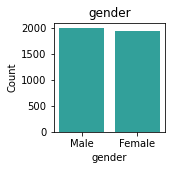

        gender  Count  Percent
Male      Male   1991    50.74
Female  Female   1933    49.26
_________________________________________________________________


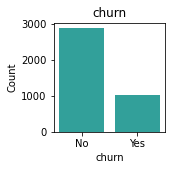

    churn  Count  Percent
No     No   2887    73.57
Yes   Yes   1037    26.43
_________________________________________________________________


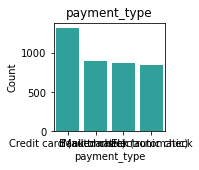

                                        payment_type  Count  Percent
Electronic check             Credit card (automatic)   1317    33.56
Mailed check                            Mailed check    894    22.78
Bank transfer (automatic)  Bank transfer (automatic)    874    22.27
Credit card (automatic)             Electronic check    839    21.38
_________________________________________________________________


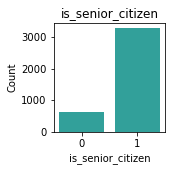

   is_senior_citizen  Count  Percent
0                  1   3289    83.82
1                  0    635    16.18
_________________________________________________________________


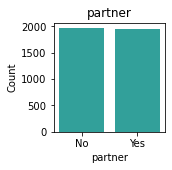

    partner  Count  Percent
No       No   1965    50.08
Yes     Yes   1959    49.92
_________________________________________________________________


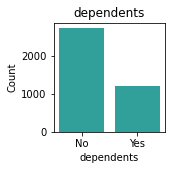

    dependents  Count  Percent
No          No   2718    69.27
Yes        Yes   1206    30.73
_________________________________________________________________


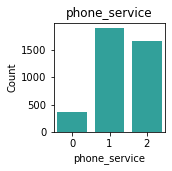

   phone_service  Count  Percent
1              1   1891    48.19
2              2   1663    42.38
0              0    370     9.43
_________________________________________________________________


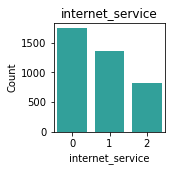

   internet_service  Count  Percent
2                 0   1743    44.42
1                 1   1354    34.51
0                 2    827    21.08
_________________________________________________________________


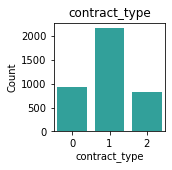

   contract_type  Count  Percent
0              1   2170    55.30
2              0    932    23.75
1              2    822    20.95
_________________________________________________________________


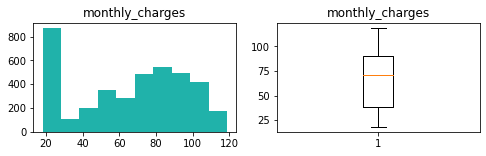

count    3924.000000
mean       65.138022
std        29.931326
min        18.250000
25%        38.737500
50%        70.450000
75%        90.000000
max       118.650000
Name: monthly_charges, dtype: float64


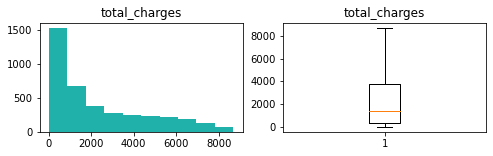

count    3924.000000
mean     2289.431919
std      2274.930876
min        18.850000
25%       396.250000
50%      1398.975000
75%      3808.787500
max      8670.100000
Name: total_charges, dtype: float64


In [28]:
explore_univariate(train, cat_vars, quant_vars)

In [ ]:
#This lets me check that I am using the same data I just prepared
train.head()